In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
con = sqlite3.connect("lpoint.db", isolation_level=None) # lpoint db 생성 or 연결

df = pd.read_sql('''
SELECT L.cust, D.ma_fem_dv, D.ages, D.zon_hlv, L.rct_no, L.cop_c, L.chnl_dv, L.de_dt, L.de_hr, L.buy_am
FROM LPAY AS L, DEMO AS D
WHERE L.cust = D.cust 
GROUP BY L.cust, D.ma_fem_dv, D.ages, D.zon_hlv, L.rct_no, L.cop_c, L.chnl_dv, L.de_dt, L.de_hr, L.buy_am;
''', con, index_col=None)

con.close()

In [3]:
df.columns = ['고객번호', '성별', '연령대', '거주지대분류코드', '영수증번호',
             '제휴사', '채널구분', '이용일자', '이용시간', '이용금액']

In [4]:
df['구매월'] = df['이용일자'].map(lambda x: str(x)[4:6]+'월')

df.loc[(df['구매월']=='03월') | (df['구매월']=='04월') | (df['구매월']=='05월'), '구매계절'] = '봄'
df.loc[(df['구매월']=='06월') | (df['구매월']=='07월') | (df['구매월']=='08월'), '구매계절'] = '여름'
df.loc[(df['구매월']=='09월') | (df['구매월']=='10월') | (df['구매월']=='11월'), '구매계절'] = '가을'
df.loc[(df['구매월']=='12월') | (df['구매월']=='01월') | (df['구매월']=='02월'), '구매계절'] = '겨울'

In [25]:
df

,고객번호,성별,연령대,거주지대분류코드,영수증번호,제휴사,채널구분,이용일자,이용시간,이용금액,구매월,구매계절
0,M000136117,여성,30대,Z11,210104110684235,A06,2,20210104,11,42600,01월,겨울
1,M000136117,여성,30대,Z11,210109140124587,A01,1,20210109,14,902500,01월,겨울
2,M000136117,여성,30대,Z11,210926220176038,D01,2,20210926,22,15100,09월,가을
3,M000136117,여성,30대,Z11,211120000687692,A06,2,20211120,0,177301,11월,가을
4,M000419293,여성,40대,Z17,210107230198829,L01,2,20210107,23,55880,01월,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...
353179,M999962961,여성,50대,Z17,210618180161128,A01,1,20210618,18,45570,06월,여름
353180,M999962961,여성,50대,Z17,210724200025828,L00,2,20210724,20,9156,07월,여름
353181,M999962961,여성,50대,Z17,210819110374913,A03,1,20210819,11,22130,08월,여름
353182,M999962961,여성,50대,Z17,211216170132931,A01,1,20211216,17,159600,12월,겨울


# 상품구매건별 확인

In [6]:
plt.rcParams['font.family'] = 'Malgun Gothic'

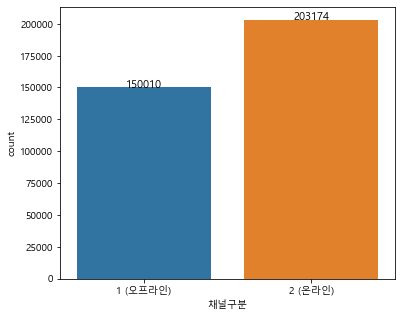

In [24]:
# 채널구분 확인
plt.figure(figsize=(6,5))
ax = sns.countplot(x='채널구분', data=df)
ax.set_xticklabels(['1 (오프라인)', '2 (온라인)'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 11)
plt.show()

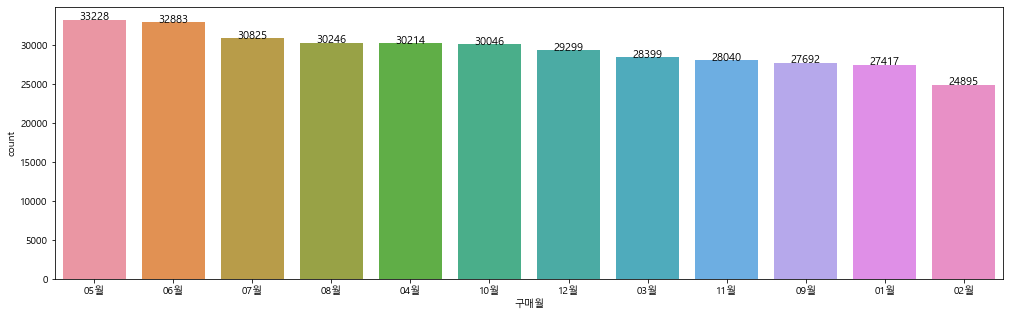

In [40]:
# 구매월
plt.figure(figsize=(17,5))
ax = sns.countplot(x='구매월', data=df, order = df['구매월'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 11)
plt.show()

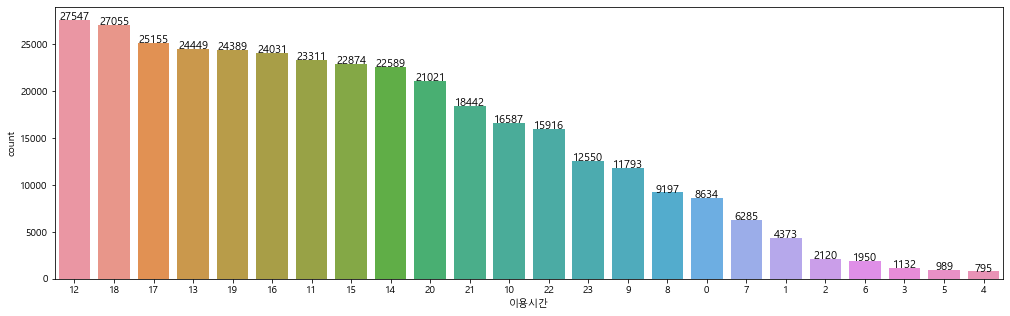

In [42]:
# 구매시간
plt.figure(figsize=(17,5))
ax = sns.countplot(x='이용시간', data=df, order = df['이용시간'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 11)
plt.show()

In [117]:
# 고객번호만 중복되지 않게 추출
cust = list(df['고객번호'].unique())
ndf = pd.DataFrame({'고객번호' : cust})

In [118]:
ndf.head()

,고객번호
0,M000136117
1,M000419293
2,M000494848
3,M000557840
4,M000871427


In [119]:
ndf['성별'] = df.groupby('고객번호')['성별'].agg(**{'most_common_value':lambda x:x.mode()[0]}).reset_index()['most_common_value']

In [120]:
ndf['연령대'] = df.groupby('고객번호')['연령대'].agg(**{'most_common_value':lambda x:x.mode()[0]}).reset_index()['most_common_value']

In [121]:
ndf['거주지분류대코드'] = df.groupby('고객번호')['거주지대분류코드'].agg(**{'most_common_value':lambda x:x.mode()[0]}).reset_index()['most_common_value']

In [122]:
ndf['채널구분'] = df.groupby('고객번호')['채널구분'].agg(**{'most_common_value':lambda x:str(x.mode()[0])+'번'}).reset_index()['most_common_value']

In [123]:
ndf['제휴사'] = df.groupby('고객번호')['제휴사'].agg(**{'most_common_value':lambda x:x.mode()[0]}).reset_index()['most_common_value']

In [124]:
ndf['구매시간'] = df.groupby('고객번호')['이용시간'].agg(**{'mean':lambda x:int(round(x.mean(),0))}).reset_index()['mean']

In [125]:
ndf['구매금액'] = df.groupby('고객번호')['이용금액'].agg(**{'median':lambda x:int(round(x.median(),0))}).reset_index()['median']

In [126]:
ndf['구매계절'] = df.groupby('고객번호')['구매계절'].agg(**{'most_common_value':lambda x:x.mode()[0]}).reset_index()['most_common_value']

In [127]:
ndf

,고객번호,성별,연령대,거주지분류대코드,채널구분,제휴사,구매시간,구매금액,구매계절
0,M000136117,여성,30대,Z11,2번,A06,12,109950,가을
1,M000419293,여성,40대,Z17,2번,L01,16,51634,봄
2,M000494848,여성,30대,Z10,2번,L01,13,36215,가을
3,M000557840,남성,30대,Z11,1번,A02,17,39565,여름
4,M000871427,여성,20대,Z10,1번,C01,14,5800,여름
...,...,...,...,...,...,...,...,...,...
8901,M999227380,여성,40대,Z17,2번,E01,16,234100,가을
8902,M999268192,여성,30대,Z10,2번,L01,12,11705,봄
8903,M999599111,여성,40대,Z04,2번,L01,14,31830,봄
8904,M999770689,여성,30대,Z16,1번,A04,11,4900,여름


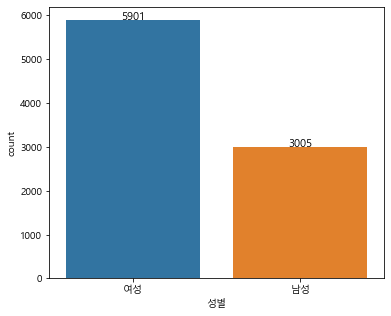

In [128]:
# 성별 확인
plt.figure(figsize=(6,5))
ax = sns.countplot(x='성별', data=ndf)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 11)
plt.show()

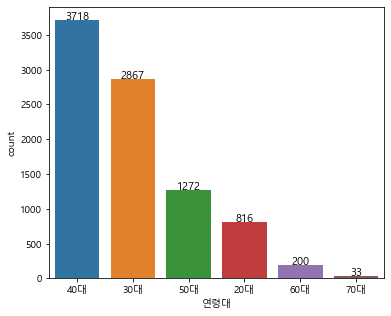

In [129]:
# 성별 + 연령대 확인
plt.figure(figsize=(6,5))
ax = sns.countplot(x='연령대', data=ndf, order = ndf['연령대'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 11)
plt.show()

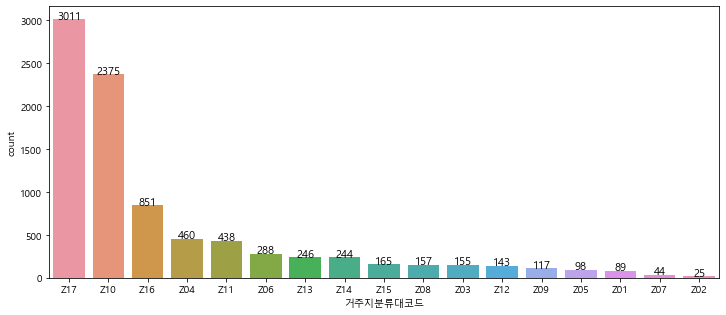

In [130]:
# 거주지분류대코드 
plt.figure(figsize=(12,5))
ax = sns.countplot(x='거주지분류대코드', data=ndf, order = ndf['거주지분류대코드'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 11)
plt.show()

In [131]:
df1 = pd.read_csv("modeling_data.csv", encoding='utf-8') # 새로운 데이터로 대체 해줘야 함

In [132]:
df1.head()

,고객번호,성별,연령대,거주지분류대코드,채널구분,상품소분류명,구매시간,구매금액,구매계절,상품대분류명,군집
0,M000034966,여성,40대,Z07,1번,가공조미료,17,4970,가을,조미료,2
1,M000136117,여성,30대,Z11,1번,여성기타모피의류,15,53500,겨울,여성의류,3
2,M000201112,여성,50대,Z17,1번,삼각김밥,12,1700,여름,조리식품,1
3,M000225114,여성,40대,Z17,1번,일반스낵,17,5500,봄,과자,2
4,M000261625,여성,40대,Z17,1번,디저트,15,46500,여름,테넌트/음식점,1


In [133]:
from tqdm import tqdm

In [134]:
item = []

In [135]:
# 기존 고객 정보가 있는 고객들은 대분류명 넣어주기
for i in tqdm(ndf['고객번호'].values):
    item.append(df1[df1['고객번호'] == i]['상품대분류명'].values[0] if i in df1['고객번호'].values else '') 

100%|█████████████████████████████████████████████████████████████████████████████| 8906/8906 [00:10<00:00, 839.87it/s]


In [136]:
ndf['상품대분류명'] = item

In [137]:
ndf.head(10)

,고객번호,성별,연령대,거주지분류대코드,채널구분,제휴사,구매시간,구매금액,구매계절,상품대분류명
0,M000136117,여성,30대,Z11,2번,A06,12,109950,가을,여성의류
1,M000419293,여성,40대,Z17,2번,L01,16,51634,봄,남성의류
2,M000494848,여성,30대,Z10,2번,L01,13,36215,가을,음료
3,M000557840,남성,30대,Z11,1번,A02,17,39565,여름,
4,M000871427,여성,20대,Z10,1번,C01,14,5800,여름,기타(비상품)
5,M000986912,여성,30대,Z10,2번,A05,11,92930,여름,과일
6,M001248380,여성,30대,Z10,2번,L01,10,550,봄,상품권
7,M001403108,남성,20대,Z10,1번,A01,15,9890,가을,
8,M001444118,남성,30대,Z17,2번,A06,17,16871,봄,
9,M001521411,여성,40대,Z04,2번,A06,14,28420,여름,대용식


In [138]:
# 기존 고객정보가 없는 고객들은 대분류명 임의로 설정
# 상품 테이블 불러오기
con = sqlite3.connect("lpoint.db", isolation_level=None) # lpoint db 생성 or 연결


# pd_clac 테이블, 데이터프레임에 저장
con = sqlite3.connect("lpoint.db", isolation_level=None)
pd_clac = pd.read_sql("SELECT * FROM PD_CLAC", con, index_col=None)

In [139]:
item1 = pd_clac['clac_hlv_nm'].unique()
item1

array(['가구', '건강식품', '건강용품', '건해산물', '계절가전', '공구/안전용품', '과일', '과자',
       '구기/필드스포츠', '금융/보험서비스', '기타(비상품)', '기타상품', '남성의류', '냉동식품',
       '냉장/세탁가전', '냉장식품', '담배', '대용식', '모바일', '문구/사무용품', '병통조림', '상품권',
       '생활/렌탈서비스', '생활/주방가전', '서적/음반/악기', '세제/위생', '속옷/양말/홈웨어', '수산물',
       '스포츠패션', '시즌스포츠', '식기/조리기구', '아웃도어/레저', '양곡', '여성의류', '여행/레저서비스',
       '영상/음향가전', '완구', '원예/애완', '유아동의류', '유아식품', '유제품', '음료', '인테리어/조명',
       '자동차용품', '조리식품', '조미료', '주류', '주방잡화', '채소', '청소/세탁/욕실용품', '축산물',
       '출산/육아용품', '침구/수예', '커피/차', '컴퓨터', '테넌트/음식점', '패션잡화', '퍼스널케어',
       '헬스/피트니스', '화장품/뷰티케어'], dtype=object)

In [140]:
pd_clac[pd_clac['clac_hlv_nm']== "테넌트/음식점"]

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
1677,PD1678,기프트샵,테넌트/음식점,비식품테넌트
1678,PD1679,사진관,테넌트/음식점,비식품테넌트
1679,PD1680,소극장,테넌트/음식점,비식품테넌트
1680,PD1681,안경점,테넌트/음식점,비식품테넌트
1681,PD1682,유원시설,테넌트/음식점,비식품테넌트
1682,PD1683,한식,테넌트/음식점,식당
1683,PD1684,양식,테넌트/음식점,식당
1684,PD1685,일식,테넌트/음식점,식당
1685,PD1686,중식,테넌트/음식점,식당
1686,PD1687,동남아식,테넌트/음식점,식당


In [141]:
import random

In [142]:
cust_item = ndf['상품대분류명'].values
citem = []

In [143]:
for i in tqdm(cust_item):
    citem.append(random.choice(item1) if i == '' else i)

100%|█████████████████████████████████████████████████████████████████████████| 8906/8906 [00:00<00:00, 1204827.49it/s]


In [144]:
ndf['상품대분류명'] = citem

In [145]:
a = ndf['상품대분류명'] == ''
a.unique()

array([False])

In [146]:
# 여성만 따로
ndf_woman = ndf.copy()[ndf['성별'] == '여성']

In [148]:
ndf_woman.to_csv('lpay_by_cust_woman.csv', index=False)

In [154]:
# 남성만 따로
ndf_man = ndf.copy()[ndf['성별'] == '남성']
ndf_man.to_csv('lpay_by_cust_man.csv', index=False)

In [155]:
ndf1 = pd.read_csv('lpay_by_cust_man.csv', encoding = 'utf-8')

In [156]:
ndf1.head()

,고객번호,성별,연령대,거주지분류대코드,채널구분,제휴사,구매시간,구매금액,구매계절,상품대분류명
0,M000557840,남성,30대,Z11,1번,A02,17,39565,여름,축산물
1,M001403108,남성,20대,Z10,1번,A01,15,9890,가을,냉동식품
2,M001444118,남성,30대,Z17,2번,A06,17,16871,봄,축산물
3,M001697471,남성,40대,Z17,1번,A02,16,51850,여름,수산물
4,M001808316,남성,30대,Z17,1번,A01,14,11760,봄,냉동식품
